# 💎🚘 CARS SELLING PREDICTION

![Car Image](image_car.jpg)


# 🗺️ Project Execution Roadmap

* **[📥 Environment & Data Loading](#section1)**
    * [📦 Importing Libraries](#section1_1)
    * [📂 CSV Data Ingestion](#section1_2)
    * [🕵️ Initial Data Inspection](#section1_3)

* **[🧹 Data Cleaning](#section2)**
    * [✂️ Unit Stripping (Regex)](#section2_1)
    * [🩹 Missing Value Imputation](#section2_2)
    * [🚫 Duplicate Removal](#section2_3)

* **[🔍 Exploratory Data Analysis (EDA)](#section3)**
    * [🔥 Correlation Heatmaps](#section3_1)
    * [📌 Top Brands Analysis](#section3_2)

* **[⚙️ Feature Engineering](#section4)**
    * [📉 Outlier Filtering](#section4_1)
    * [🔢 Ordinal & One-Hot Encoding](#section4_2)
    * [🎯 Target & Features Splitting](#section4_3)
    * [⚖️ Feature Scaling](#section4_4)

* **[🤖 Machine Learning Modeling](#section5)**
    * [🧪 Multiple Model Testing](#section5_1)
    * [🎯 Hyperparameter Tuning (GridSearch)](#section5_1)
    * [🏆 Best Model Selection (Random Forest)](#section5_2)
    * [💾 Model Export](#section5_3)

* **[🤖 Data Dashboard](#section6)**


---
<a id='main_menu'></a>

<a id='section1'></a>
# 📂 Loading & Inspecting Data

<a id='section1_1'></a>
*📦 Importing Libraries

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib

In [245]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

<a id='section1_2'></a>
* 📂 CSV Data Ingestion

In [246]:
df = pd.read_csv(r'C:\Users\Enter Computer\Downloads\Project_04_reg_cars_selling/reg_cars_selling.csv')

[↑ Back to Roadmap](#main_menu)

<a id='section1_3'></a>
* 🕵️ Initial Data Inspection

In [247]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.00


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [249]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [250]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


[↑ Back to Roadmap](#main_menu)

<a id='section2'></a>
# 🛠️ Data Cleaning


<a id='section2_1'></a>
* 🪓 String Manipulation

In [251]:
df['mileage'].str.contains('km/kg').sum()

88

In [252]:
df['mileage'] = df['mileage'].str.replace('kmpl',' ').str.replace('km/kg',' ').astype(float)

In [253]:
df['engine'] = df['engine'].str.replace('CC',' ').astype(float)

In [254]:
df['max_power'] = df['max_power'].str.replace('bhp',' ')

In [255]:
df['max_power'] = (
    df['max_power']
    .astype(str)
    .str.extract(r'([\d.]+)')[0]
    .astype(float)
)


In [256]:
df.drop(columns='torque',inplace=True)

In [257]:
df['brand'] = df['name'].str.split(' ').str[0]

In [258]:
df['seats'] = df['seats'].astype('Int32')

[↑ Back to Roadmap](#main_menu)

<a id='section2_2'></a>
* ❓ Missing Values 


In [259]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
brand              0
dtype: int64

In [260]:
df['mileage'].fillna(df['mileage'].median(),inplace=True)

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\1327670529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(),inplace=True)


In [261]:
df['engine'].fillna(df['engine'].median(),inplace=True)

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3115608822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(),inplace=True)


In [262]:
df['max_power'].fillna(df['max_power'].median(),inplace=True)

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3175110122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].median(),inplace=True)


In [263]:
df['seats'].fillna(df['seats'].median(),inplace=True)

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3486464094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seats'].fillna(df['seats'].median(),inplace=True)


In [264]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
brand            0
dtype: int64

[↑ Back to Roadmap](#main_menu)

<a id='section2_3'></a>
* 🔄 Duplicates 

In [265]:
df.duplicated().sum()

np.int64(1202)

In [266]:
df.drop_duplicates(inplace=True, keep='first')

In [267]:
df.duplicated().sum()

np.int64(0)

In [268]:
df = df[df['mileage'] > 0]
df = df[df['max_power'] > 0]
df = df[df['seats'] < 14]

[↑ Back to Roadmap](#main_menu)

<a id='section3'></a>
# 🔍 EDA


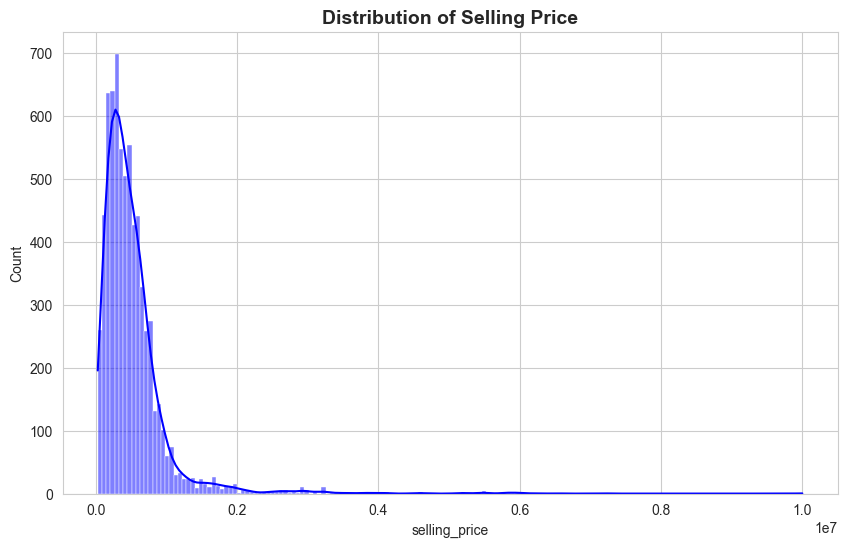

In [269]:
# Selling price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, color='blue')
plt.title('Distribution of Selling Price', fontsize=14, fontweight='bold')
plt.show()

In [270]:
# The Most Expensive Car
df[df['selling_price'] == df['selling_price'].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.00,400.00,4,Volvo


In [271]:
# The Cheapest Car
df[df['selling_price'] == df['selling_price'].min()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
5714,Maruti 800 AC,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.10,796.00,37.00,4,Maruti


In [272]:
# The Most Used Car (Max KM)
df[df['km_driven'] == df['km_driven'].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
3486,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.60,1197.00,81.83,5,Hyundai


In [273]:
# The lowst Used Car (Max KM)
df[df['km_driven'] == df['km_driven'].min()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
7913,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.10,1196.00,73.00,5,Maruti


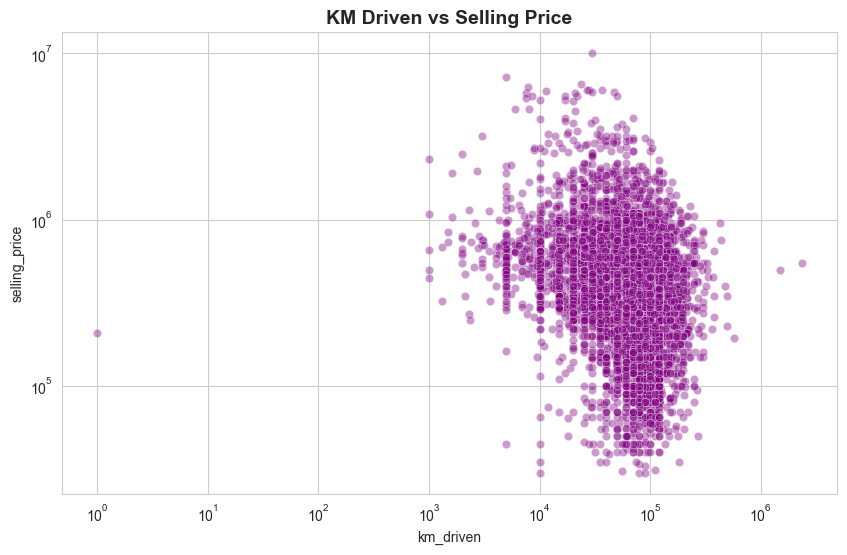

In [274]:
# KM Driven vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', alpha=0.4, color='purple')
plt.xscale('log') # لتقريب النقاط من بعضها
plt.yscale('log')
plt.title('KM Driven vs Selling Price', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\1010336967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


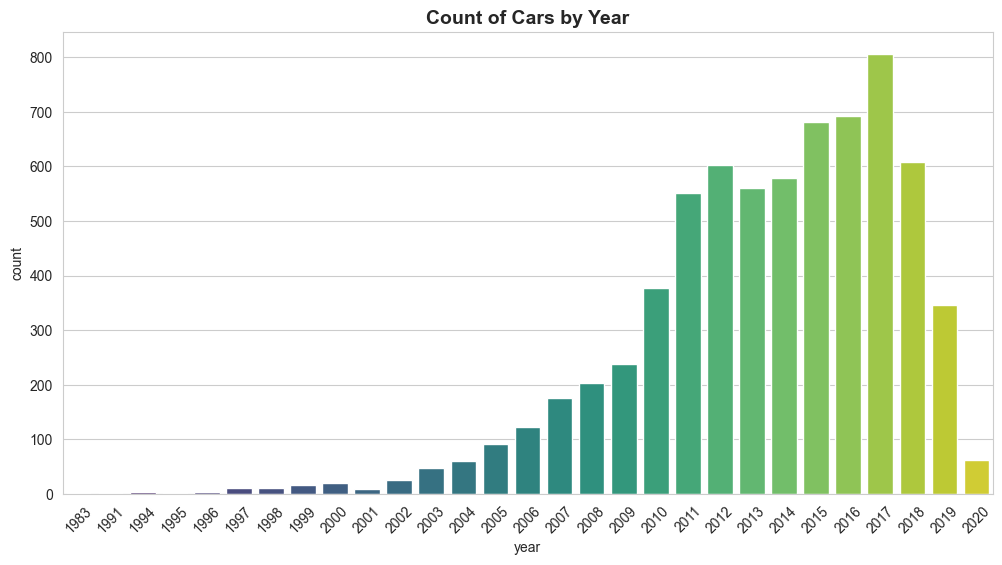

In [275]:
# Count of Cars by Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Cars by Year', fontsize=14, fontweight='bold')
plt.show()

In [276]:
# Newest Model Year
df[df['year'] == df['year'].max()].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
106,Ford Freestyle Titanium Petrol BSIV,2020,400000,5000,Petrol,Individual,Manual,Second Owner,19.00,1194.00,94.68,5,Ford
115,Maruti Celerio VXI,2020,475000,13000,Petrol,Individual,Manual,First Owner,21.63,998.00,67.04,5,Maruti
196,Hyundai Elite i20 Sportz Plus BSIV,2020,720000,5000,Petrol,Individual,Manual,First Owner,18.60,1197.00,81.86,5,Hyundai
224,Hyundai Xcent 1.2 VTVT SX,2020,524000,32000,Petrol,Individual,Manual,First Owner,20.14,1197.00,81.86,5,Hyundai
402,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88,1196.00,61.70,5,Maruti


In [277]:
# Oldest Model Year
df[df['year'] == df['year'].min()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
316,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,Third Owner,19.30,1248.00,82.00,5,Mahindra


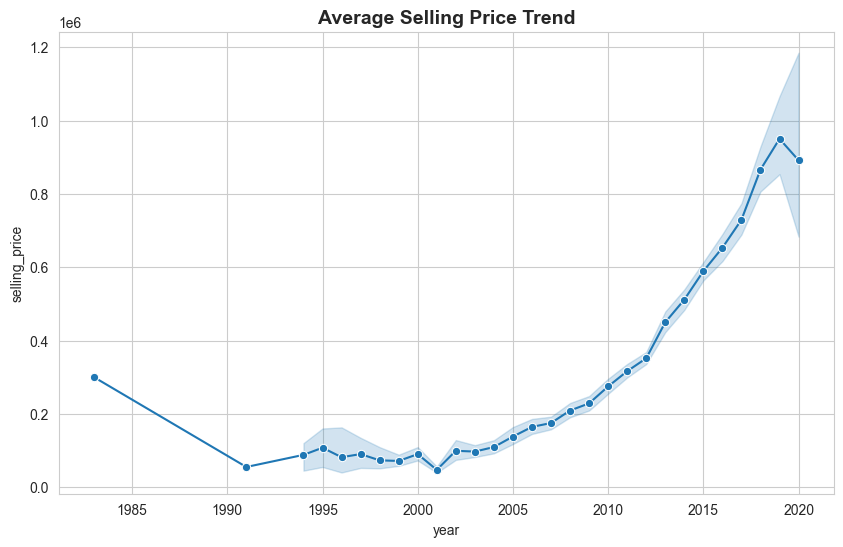

In [278]:
# Average Selling Price Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='selling_price', estimator='mean', marker='o')
plt.title('Average Selling Price Trend', fontsize=14, fontweight='bold')
plt.show()

In [279]:
# Fuel Type
df['fuel'].value_counts()

fuel
Diesel    3747
Petrol    3066
CNG         56
LPG         38
Name: count, dtype: int64

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\2587680263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel', palette='Set2')


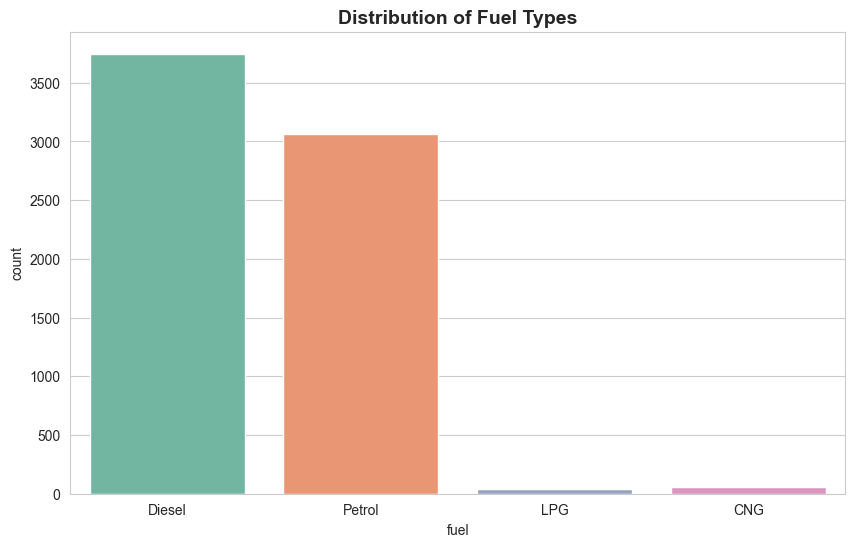

In [280]:
# Distribution of Fuel Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fuel', palette='Set2')
plt.title('Distribution of Fuel Types', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\1055782300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')


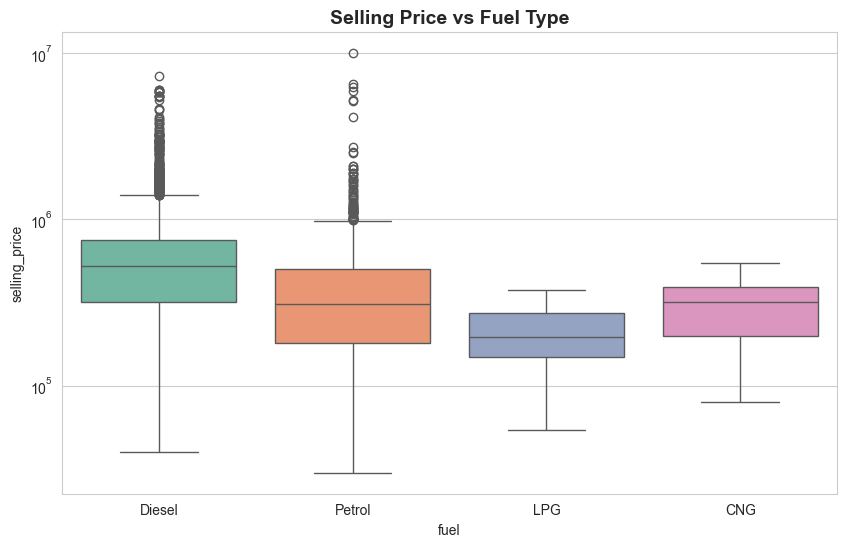

In [281]:
# Selling Price vs Fuel
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')
plt.yscale('log') 
plt.title('Selling Price vs Fuel Type', fontsize=14, fontweight='bold')
plt.show()

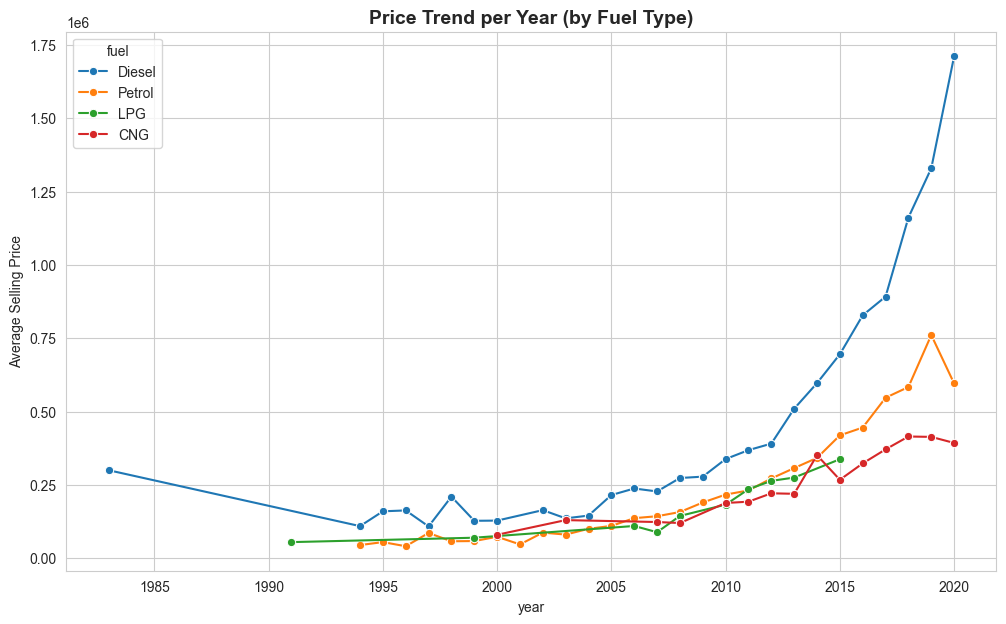

In [282]:
# Price Trend per Year (by Fuel Type)
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='year', y='selling_price', hue='fuel', marker='o', errorbar=None)
plt.title('Price Trend per Year (by Fuel Type)', fontsize=14, fontweight='bold')
plt.ylabel('Average Selling Price')
plt.show()

In [283]:
# Seller Type
df['seller_type'].value_counts()

seller_type
Individual          6204
Dealer               676
Trustmark Dealer      27
Name: count, dtype: int64

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\1897975368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='seller_type', y='selling_price', palette='muted')


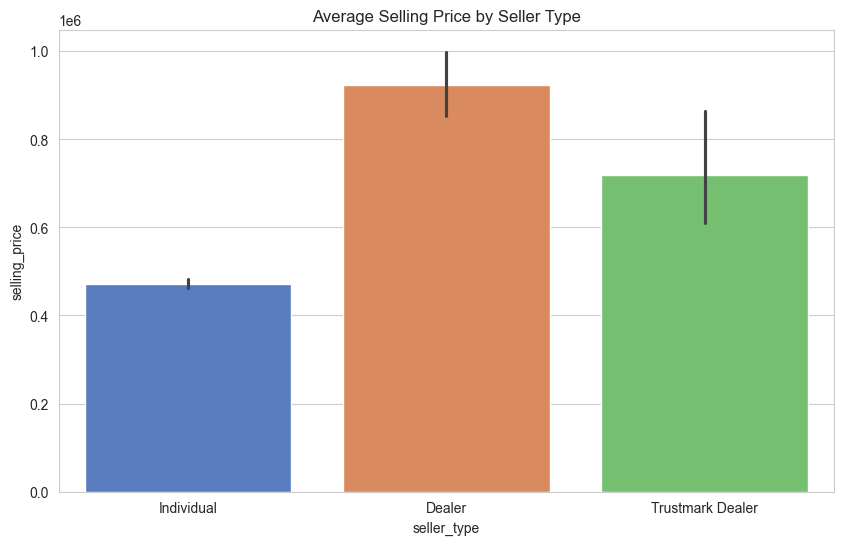

In [284]:
# verage Selling Price by Seller Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='seller_type', y='selling_price', palette='muted')
plt.title('Average Selling Price by Seller Type')
plt.show()

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\474881147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transmission', palette='Set1')


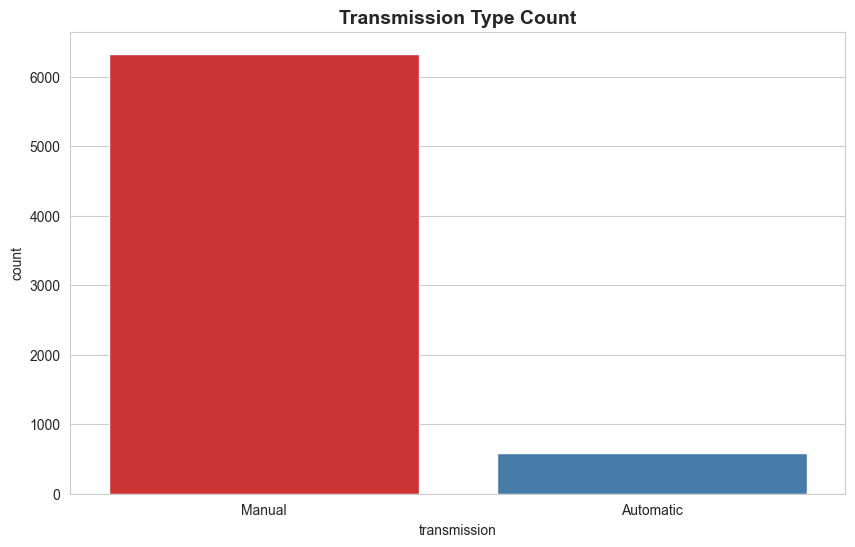

In [285]:
# Transmission Type Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transmission', palette='Set1')
plt.title('Transmission Type Count', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3194268904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set1')


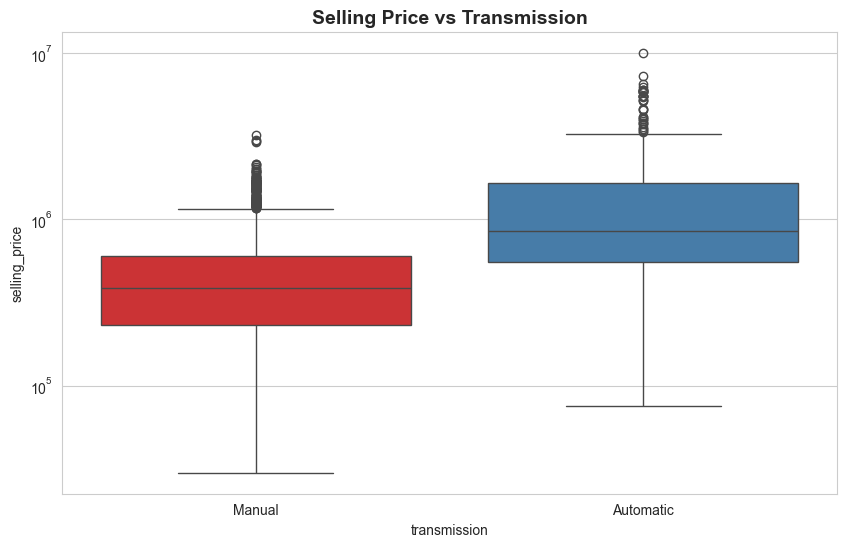

In [286]:
# Selling Price vs Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set1')
plt.yscale('log')
plt.title('Selling Price vs Transmission', fontsize=14, fontweight='bold')
plt.show()

In [287]:
# Owner Types 
df['owner'].value_counts()

owner
First Owner             4228
Second Owner            1971
Third Owner              535
Fourth & Above Owner     168
Test Drive Car             5
Name: count, dtype: int64

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3348558368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='owner', palette='pastel', order=df['owner'].value_counts().index)


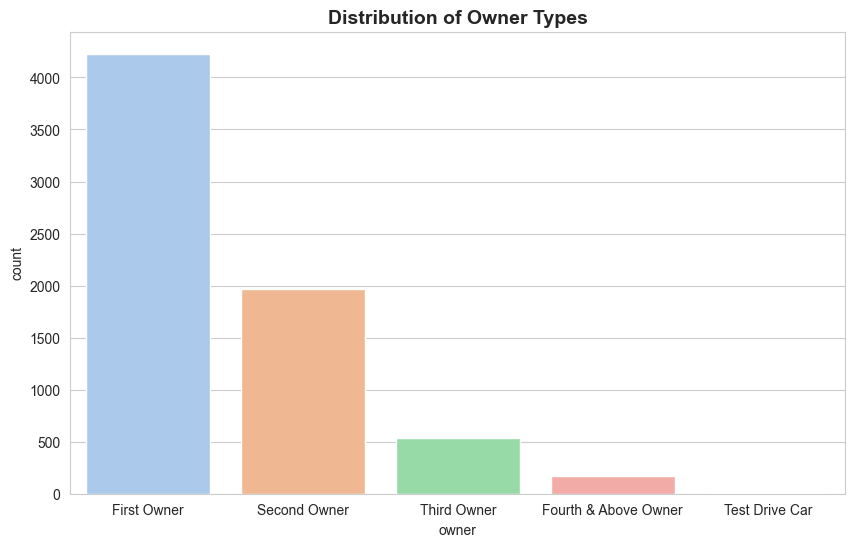

In [288]:
# Distribution of Owner Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='owner', palette='pastel', order=df['owner'].value_counts().index)
plt.title('Distribution of Owner Types', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\1584904077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='owner', y='selling_price', palette='Set1')


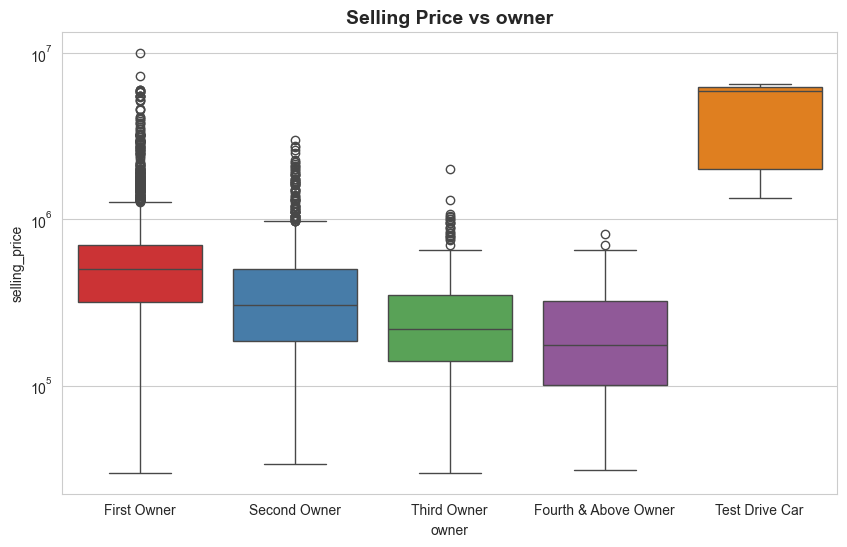

In [289]:
# Selling Price vs owner
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set1')
plt.yscale('log')
plt.title('Selling Price vs owner', fontsize=14, fontweight='bold')
plt.show()

In [290]:
# Seats
df['seats'].value_counts()

seats
5     5446
7      966
8      222
4      124
9       74
6       57
10      18
Name: count, dtype: Int64

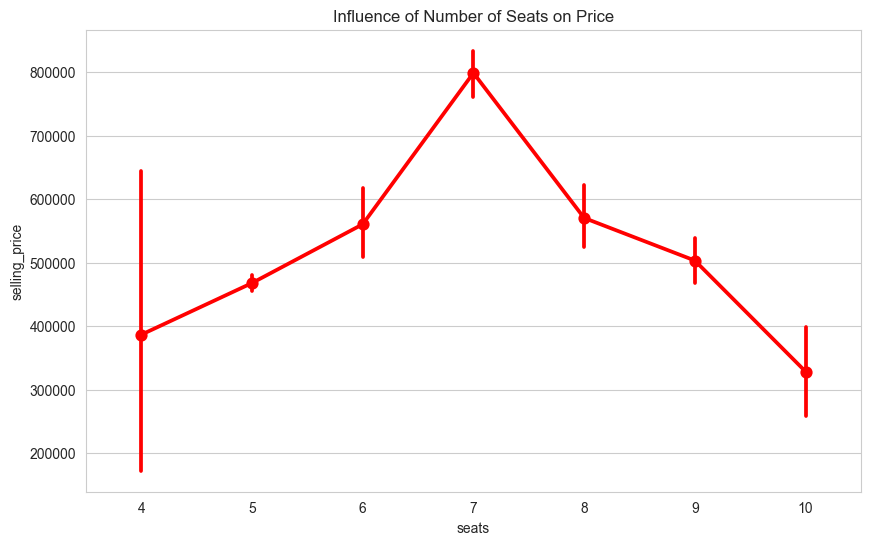

In [291]:
# Influence of Number of Seats on Price
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='seats', y='selling_price', color='red')
plt.title('Influence of Number of Seats on Price')
plt.show()

In [292]:
# Brand type
df['brand'].value_counts()

brand
Maruti           2163
Hyundai          1260
Mahindra          721
Tata              644
Honda             362
Ford              361
Toyota            357
Chevrolet         216
Renault           206
Volkswagen        172
Nissan             73
Skoda              70
Datsun             57
BMW                47
Mercedes-Benz      44
Fiat               44
Audi               33
Jeep               22
Mitsubishi         11
Volvo               9
Jaguar              8
Isuzu               4
Force               4
Ambassador          4
Daewoo              3
Kia                 3
MG                  3
Land                2
Lexus               1
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\2815574941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_top_10, x='brand', y='selling_price', palette='Spectral', order=top_10_brands_list)


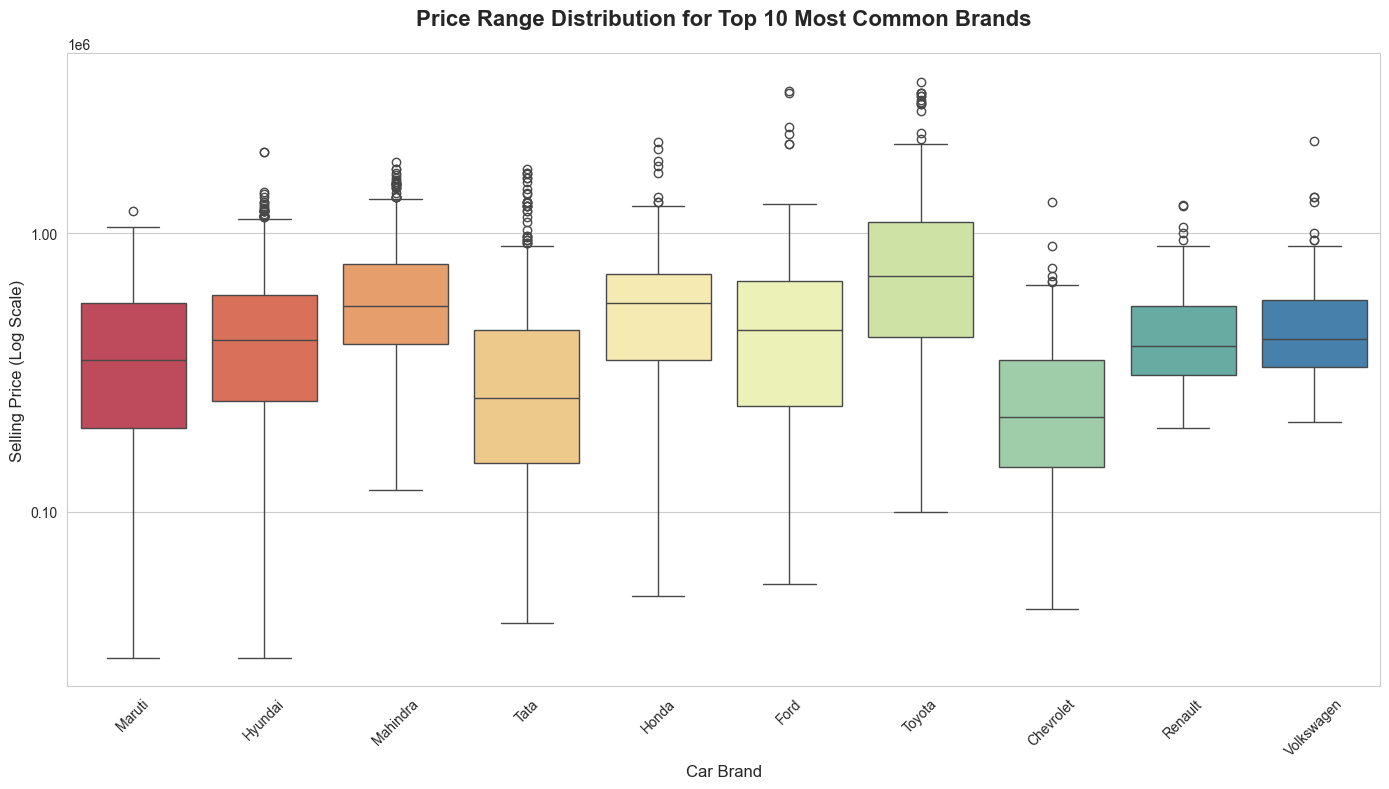

In [293]:
from matplotlib.ticker import ScalarFormatter
# Price Range Distribution for Top 10 Most Common Brands
top_10_brands_list = df['brand'].value_counts().head(10).index
df_top_10 = df[df['brand'].isin(top_10_brands_list)]

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

ax = sns.boxplot(data=df_top_10, x='brand', y='selling_price', palette='Spectral', order=top_10_brands_list)

plt.yscale('log')  
plt.title('Price Range Distribution for Top 10 Most Common Brands', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Car Brand', fontsize=12)
plt.ylabel('Selling Price (Log Scale)', fontsize=12)

ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

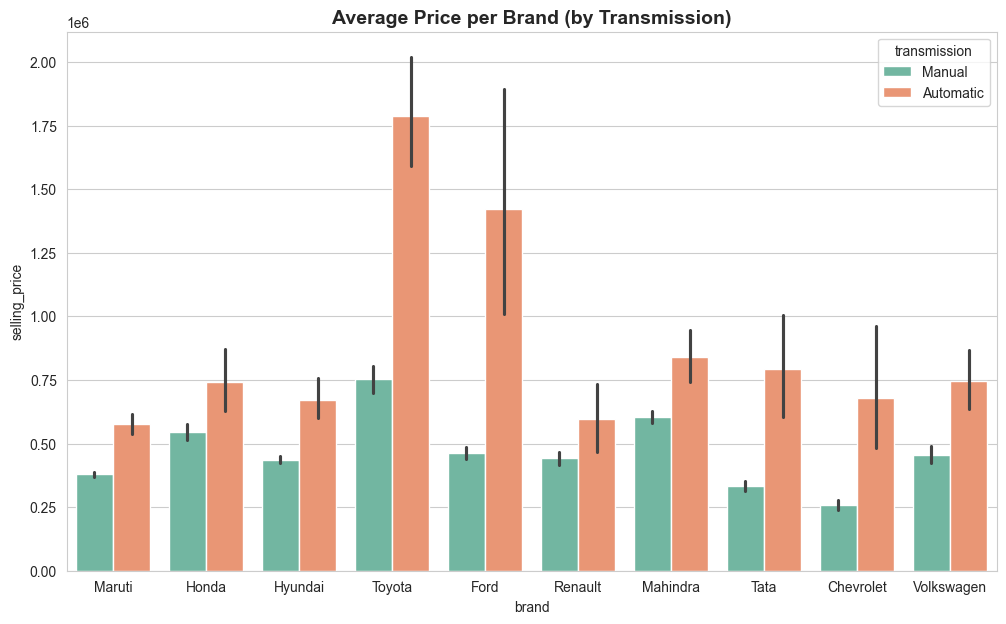

In [294]:
# Average Price per Brand (by Transmission)
top_5_brands = df['brand'].value_counts().head(10).index
df_top_5 = df[df['brand'].isin(top_5_brands)]

plt.figure(figsize=(12, 7))
sns.barplot(data=df_top_5, x='brand', y='selling_price', hue='transmission', palette='Set2')
plt.title('Average Price per Brand (by Transmission)', fontsize=14, fontweight='bold')
plt.show()

<a id='section3_2'></a>
* Top 10 Car Brands

C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3705333421.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette='viridis')
C:\Users\Enter Computer\AppData\Local\Temp\ipykernel_21048\3705333421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_price.values, y=top_10_price.index, palette='magma')


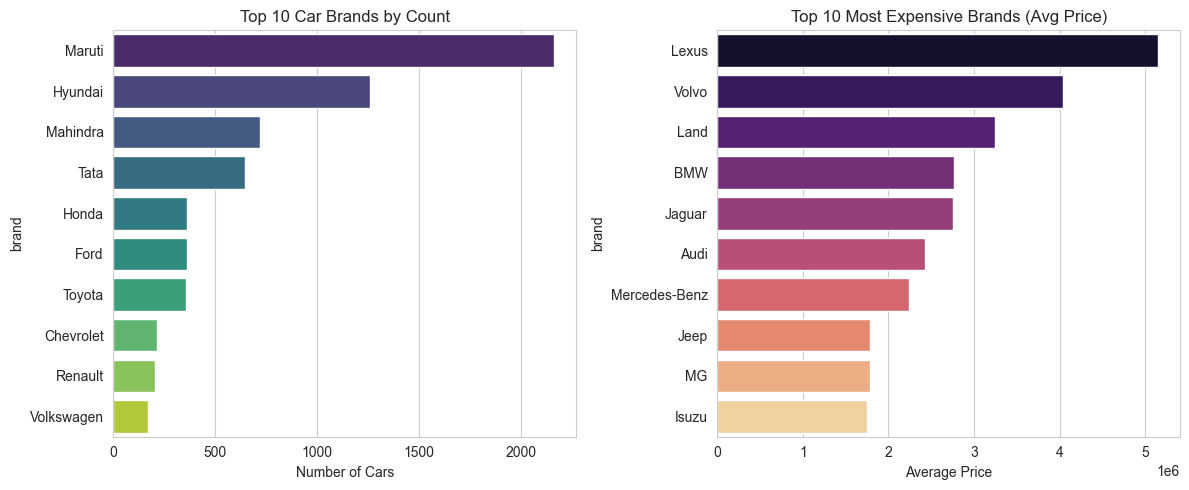

In [295]:
# Top 10 Car Brands
top_10_counts = df['brand'].value_counts().head(10)
 
top_10_price = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)
 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette='viridis')
plt.title('Top 10 Car Brands by Count')
plt.xlabel('Number of Cars')

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_price.values, y=top_10_price.index, palette='magma')
plt.title('Top 10 Most Expensive Brands (Avg Price)')
plt.xlabel('Average Price')

plt.tight_layout()
plt.show()

In [296]:
df[df['brand'].isin(['Volvo', 'Lexus'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
132,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.00,214.56,5,Lexus
145,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.00,1969.00,190.00,5,Volvo
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.00,400.00,4,Volvo
374,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.00,190.00,5,Volvo
388,Volvo V40 D3 R-Design,2018,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.80,1984.00,150.00,5,Volvo
2840,Volvo S60 D4 SUMMUM,2016,1950000,48000,Diesel,Dealer,Automatic,First Owner,9.00,1984.00,181.00,5,Volvo
2876,Volvo V40 Cross Country D3,2013,1200000,72500,Diesel,Individual,Automatic,Second Owner,23.30,1984.00,150.00,5,Volvo
5020,Volvo S60 D4 SUMMUM,2014,2500000,30000,Diesel,Individual,Automatic,First Owner,9.00,1984.00,181.00,5,Volvo
7516,Volvo XC60 Inscription D5 BSIV,2018,5500000,50000,Diesel,Individual,Automatic,First Owner,11.20,1969.00,235.00,5,Volvo
7930,Volvo S90 D4 Inscription BSIV,2019,5500000,17000,Diesel,Individual,Automatic,First Owner,18.00,1969.00,190.00,5,Volvo


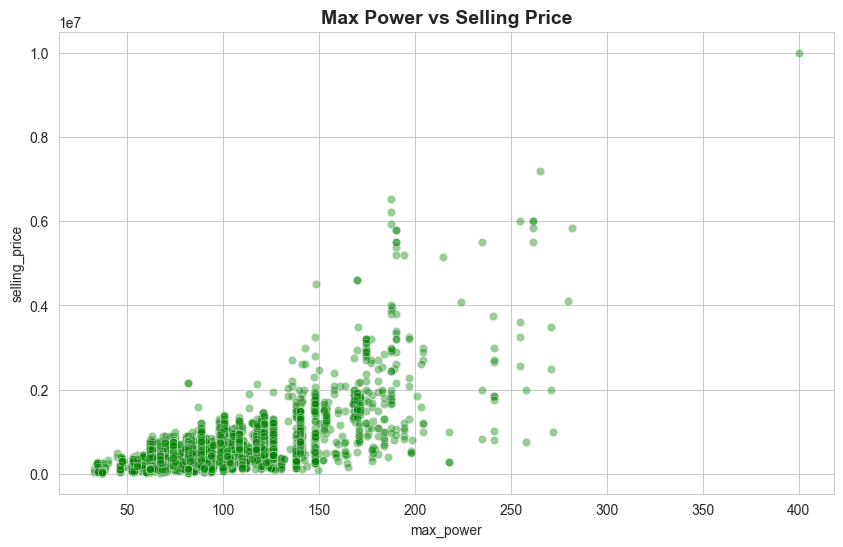

In [297]:
# Max Power vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='max_power', y='selling_price', alpha=0.4, color='green')
plt.title('Max Power vs Selling Price', fontsize=14, fontweight='bold')
plt.show()

<a id='section3_1'></a>
* Correlation Heatmap

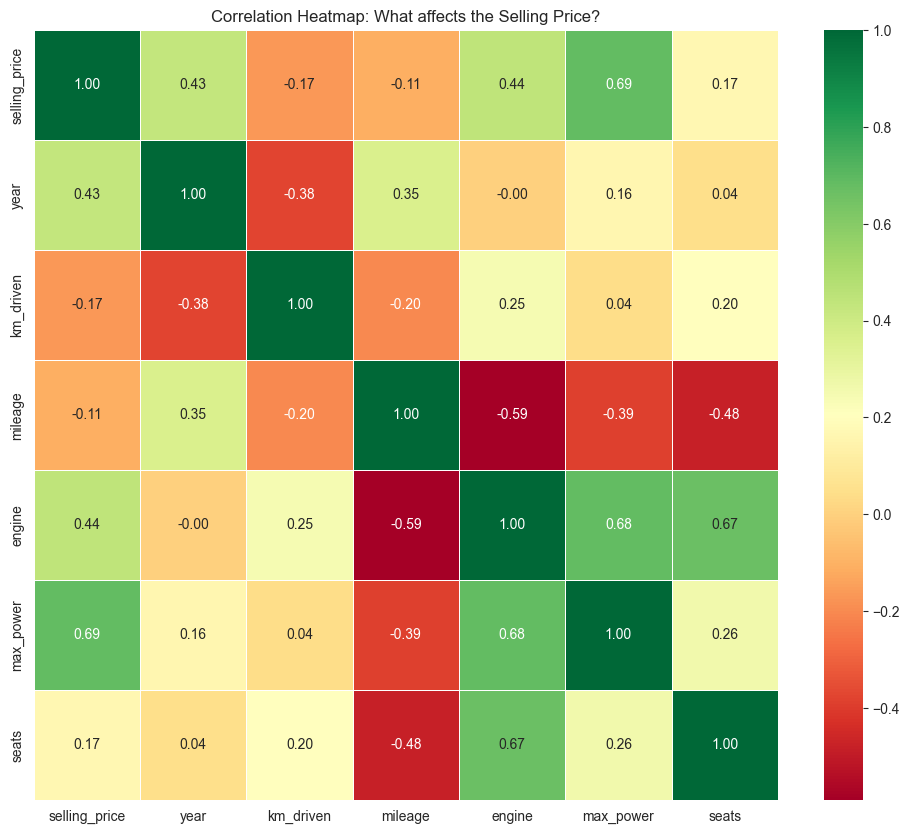

In [298]:
# Correlation Heatmap
corr = df[[ 'selling_price', 'year', 'km_driven' , 'mileage', 'engine', 'max_power', 'seats']].corr()

 
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: What affects the Selling Price?')
plt.show()

[↑ Back to Roadmap](#main_menu)

# 🛠️ Feature Engineering
<a id='section4'></a>

* ✖️ Outliers
<a id='section4_1'></a>

In [299]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6907.00,6907.00,6907.00,6907.00,6907.00,6907.00,6907.00
mean,2013.42,517014.44,74030.33,19.50,1425.12,87.59,5.42
std,4.08,518823.86,58407.16,3.89,486.65,31.24,0.97
min,1983.00,29999.00,1.00,9.00,624.00,32.80,4.00
25%,2011.00,250000.00,40000.00,16.96,1197.00,68.00,5.00
50%,2014.00,400000.00,70000.00,19.30,1248.00,81.86,5.00
75%,2017.00,633000.00,100000.00,22.32,1498.00,99.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,10.00


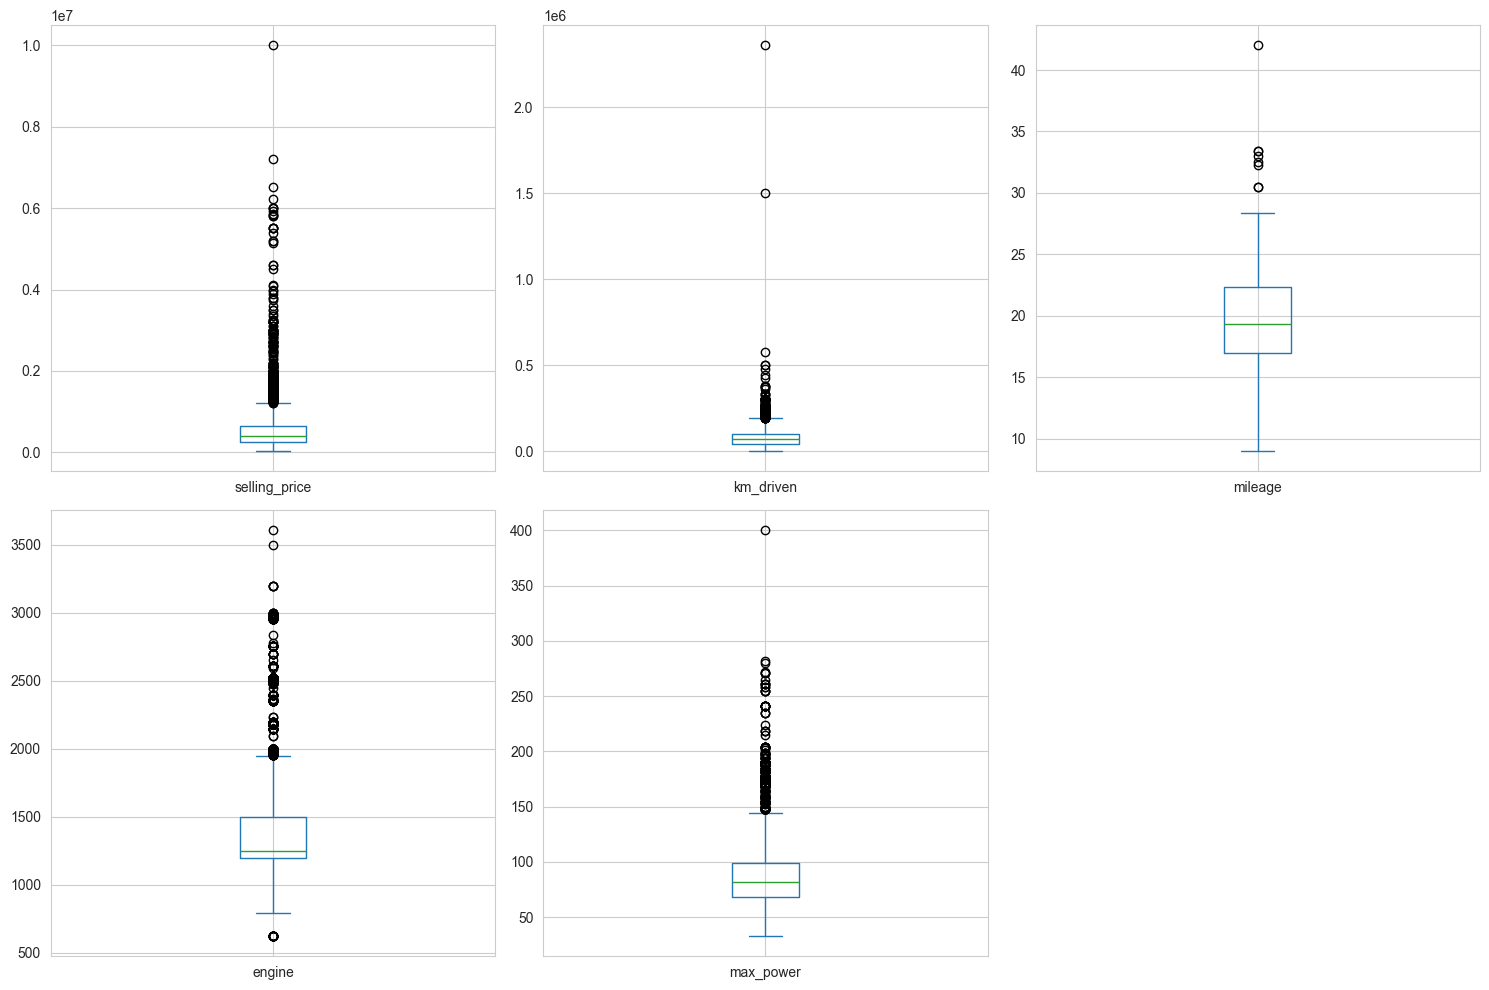

In [300]:
columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']
df[columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [301]:
#Q1 = df['selling_price'].quantile(0.25)
#Q3 = df['selling_price'].quantile(0.75)
#IQR = Q3 - Q1

#lower = Q1 - 1.5 * IQR
#upper = Q3 + 1.5 * IQR

#df = df[(df['selling_price'] >= lower) & (df['selling_price'] <= upper)]

In [302]:
#Q1 = df['km_driven'].quantile(0.25)
#Q3 = df['km_driven'].quantile(0.75)
#IQR = Q3 - Q1

#lower = Q1 - 1.5 * IQR
#upper = Q3 + 1.5 * IQR

#df = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]

In [303]:
#Q1 = df['engine'].quantile(0.25)
#Q3 = df['engine'].quantile(0.75)
#IQR = Q3 - Q1

#lower = Q1 - 1.5 * IQR
#upper = Q3 + 1.5 * IQR

#df = df[(df['engine'] >= lower) & (df['engine'] <= upper)]

In [304]:
#Q1 = df['mileage'].quantile(0.25)
#Q3 = df['mileage'].quantile(0.75)
#IQR = Q3 - Q1

#lower = Q1 - 1.5 * IQR
#upper = Q3 + 1.5 * IQR

#df = df[(df['mileage'] >= lower) & (df['mileage'] <= upper)]

In [305]:
#Q1 = df['max_power'].quantile(0.25)
#Q3 = df['max_power'].quantile(0.75)
#IQR = Q3 - Q1

#lower = Q1 - 1.5 * IQR
#upper = Q3 + 1.5 * IQR

#df = df[(df['max_power'] >= lower) & (df['max_power'] <= upper)]

[↑ Back to Roadmap](#main_menu)

* 🏷️ Encoding 
<a id='section4_2'></a>


In [306]:
owner_encoder = OrdinalEncoder(
    categories=[[
        'First Owner',
        'Second Owner',
        'Third Owner',
        'Fourth & Above Owner',
        'Test Drive Car'
    ]]
)

df[['owner_enc']] = owner_encoder.fit_transform(df[['owner']])


In [307]:
enc = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

ohe = enc.fit_transform(df[['fuel', 'seller_type', 'transmission']])

ohe_cols = enc.get_feature_names_out(['fuel', 'seller_type', 'transmission'])

df[ohe_cols] = ohe

 


In [308]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,owner_enc,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,...,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,...,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.00,...,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.00,...,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.00,...,3.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


[↑ Back to Roadmap](#main_menu)

* 📂 Splitting Data
<a id='section4_3'></a>

In [309]:
current_year = datetime.now().year
df['car_age'] = current_year - df['year']

In [310]:
X = df.drop(['name','year','selling_price','fuel','seller_type','transmission','owner','brand'],axis=1)
y = df['selling_price']

In [311]:
X

,km_driven,mileage,engine,max_power,seats,owner_enc,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,car_age
0,145500,23.40,1248.00,74.00,5,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,12
1,120000,21.14,1498.00,103.52,5,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,12
2,140000,17.70,1497.00,78.00,5,2.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,20
3,127000,23.00,1396.00,90.00,5,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,16
4,120000,16.10,1298.00,88.20,5,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,50000,18.90,998.00,67.10,5,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,13
8122,80000,22.54,1396.00,88.73,5,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,12
8123,110000,18.50,1197.00,82.85,5,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,13
8124,119000,16.80,1493.00,110.00,5,3.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,19


In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* ⚖️ Scaling
<a id='section4_4'></a>

In [313]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # بنعمل transform بس للـ test
 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

[↑ Back to Roadmap](#main_menu)

# 💡 Building the Model
<a id='section5'></a>

<a id='section5_1'></a>
* 🎯 Hyperparameter Tuning

In [314]:
# 1️⃣ Linear Regression
param_lr = {
    'regressor': [LinearRegression()]
    # غالباً ملوش hyperparameters للتعديل
}

# 2️⃣ Lasso
param_lasso = {
    'regressor': [Lasso(max_iter=5000, random_state=42)],
    'regressor__alpha': [0.1, 0.01, 0.001]
}

# 3️⃣ Decision Tree Regressor
param_dt = {
    'regressor': [DecisionTreeRegressor(random_state=42)],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 4️⃣ Random Forest
param_rf = {
    'regressor': [RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    )],
    'regressor__n_estimators': [100, 300, 500],
    'regressor__max_depth': [None, 15, 25],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': ['sqrt', 'log2']
}

* 🏆 Best Model Selection
<a id='section5_2'></a>

In [315]:
# Pipeline Setup
pipe = Pipeline([
    ('regressor', LinearRegression()) # البداية بموديل افتراضي
])

params = [param_lr, param_lasso, param_dt, param_rf]

# GridSearchCV
gs = GridSearchCV(
    pipe,
    params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'regressor': [LinearRegression()]}, {'regressor': [Lasso(max_ite...ndom_state=42)], 'regressor__alpha': [0.1, 0.01, ...]}, ...]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and par

In [316]:
gs.best_params_

{'regressor': RandomForestRegressor(n_jobs=-1, random_state=42),
 'regressor__max_depth': 15,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 500}

In [317]:
gs.best_score_

np.float64(0.857502589518826)

* 💾 Model Export
<a id='section5_3'></a>

In [318]:
joblib.dump(gs.best_estimator_, 'model.pkl')

['model.pkl']

In [319]:
my_model = joblib.load('model.pkl')

X_train.head(5)

,km_driven,mileage,engine,max_power,seats,owner_enc,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,car_age
3823,30000,19.20,1086.00,68.05,5,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,14
2080,160000,13.93,2179.00,138.00,7,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,15
5997,70000,21.10,814.00,55.20,5,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,12
1026,40000,23.10,998.00,67.04,5,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,9
5226,120000,12.05,2179.00,120.00,7,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,17


In [320]:
input_data = np.array([[160000, 20,1000, 100, 5, 1, 0,0,0,1,1,0,0,0,1,5]])

input_data_scaled = scaler.transform(input_data)
input_data_scaled

c:\Users\Enter Computer\Downloads\Project_04_reg_cars_selling\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.40017368,  0.13004148, -0.87550151,  0.3884739 , -0.43621944,
         0.64917787, -0.09361582, -1.08881686, -0.0751167 ,  1.12072426,
         3.02284877, -2.97464029, -0.05389191, -0.30421208,  0.30421208,
        -1.87085394]])

In [321]:
prediction_scaled = my_model.predict(input_data_scaled)
prediction_scaled

array([566203.31229697])

[↑ Back to Roadmap](#main_menu)

<a id='section6'></a>
# Dashboard

In [322]:
df_dash = df[['name','year','km_driven',
             'fuel','seller_type',
             'transmission','owner',
             'mileage','engine',
             'max_power','seats','brand',
             'car_age','selling_price']]

In [323]:
df_dash.to_csv('cleaned_cars_dashboard.csv', index=False)


In [324]:
df_dash

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,car_age,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.00,74.00,5,Maruti,12,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.00,103.52,5,Skoda,12,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.00,78.00,5,Honda,20,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.00,90.00,5,Hyundai,16,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.00,88.20,5,Maruti,19,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998.00,67.10,5,Maruti,13,260000
8122,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.00,88.73,5,Hyundai,12,475000
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.00,82.85,5,Hyundai,13,320000
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.00,110.00,5,Hyundai,19,135000
